## Outliers

Many datasets will contain errors of some kind that will show in the data as outliers.  These will alter
the distribution of the data and get in the way of being able to accurately model the data. So, it is 
in our interests to remove these outliers. 

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set()

## Why are they there?

While outliers might get in the way of good modelling, they are there for a reason. That could be just a human
or instrument error when collecting the data or it could be some higher order effect that is 
informative in itself. 

Outliers in the grades data:
- People without an ATAR
- Poeple who withdrew from the unit

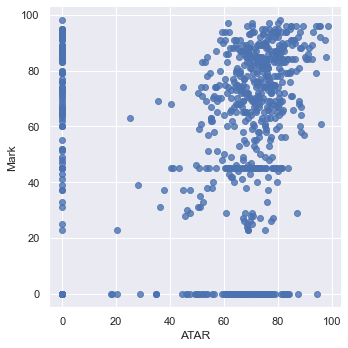

In [3]:
grades = pd.read_csv("files/grades.csv")
sns.lmplot(data=grades, x='ATAR', y="Mark", fit_reg=False )

## Identifying Outliers

To identify outliers we need to know what normal is - so the descriptive statistics described earlier 
play a part in determining what is unusual.  

A common assumption (or model) is a **normal distribution** for the data. Normally distributed data will be 
evenly distributed around the mean with fewer points the further away from the mean you go.  If this is
the case we could define an outlier as a point that falls some number of standard deviations away from
the mean.  There are some [tests for outliers](http://www.itl.nist.gov/div898/handbook/eda/section3/eda35h.htm)
based on this idea. 

/Users/alex/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/alex/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mark', ylabel='Density'>

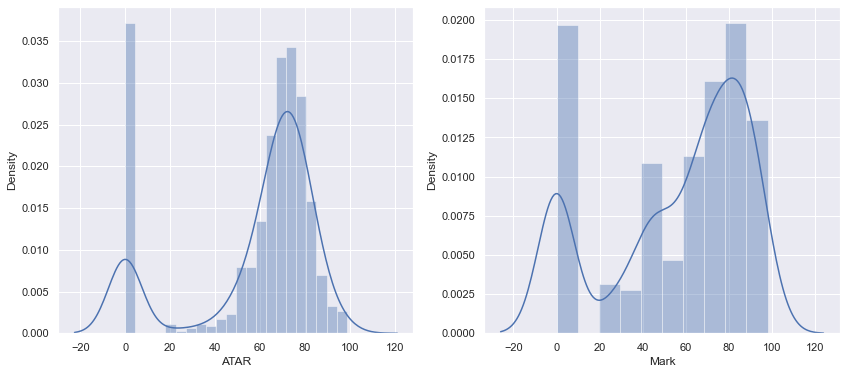

In [8]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False, figsize=(14,6))
sns.distplot(grades.ATAR, ax=ax1)
sns.distplot(grades.Mark, ax=ax2)

## Identifying Outliers

Another way to look for outliers is based on our understanding of the data. In the Adult data used in
the text they exclude high income earners below 22 and above 72 because such people
are not very likely to be able to earn that much.  **How valid is this?**

## Filtering data

* Removing outliers can be done with filtering operations on DataFrames
* Identify the target rows and generate a boolean vector
* Create a new dataframe without these target rows, or
* Use the drop method to remove them from the data frame


In [37]:
grades.ATAR != 0

0       True
1       True
2       True
3       True
4       True
       ...  
756    False
757     True
758     True
759    False
760     True
Name: ATAR, Length: 761, dtype: bool

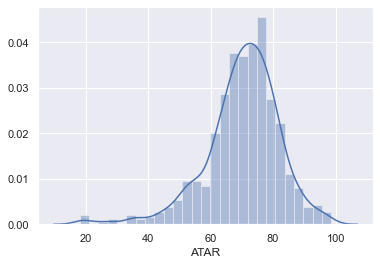

In [29]:
newgrades = grades[grades.ATAR != 0] 
sns.distplot(newgrades.ATAR)

## Using .drop

* The `.drop` method takes an array of indexes to be dropped
* First subset the `.index` to get the indexes of our target rows
* Then call `.drop` to drop the rows, returns a new DataFrame

In [31]:
# find the indexes of the rows where ATAR is zero
grades.index[grades.ATAR == 0]

Int64Index([ 19,  20,  21,  22,  27,  28,  30,  32,  33,  40,
            ...
            724, 725, 726, 727, 728, 729, 740, 746, 756, 759],
           dtype='int64', length=127)

In [1]:
newgrades.ATAR  = grades.drop(index=grades.index[grades.ATAR==0])
sns.distplot(newgrades.ATAR)

NameError: name 'grades' is not defined

## Outliers

* Outliers can affect the quality of your model
* They might just be due to measurement or human error
* Might be an effect of some process you aren't interested in
* Might be some unknown process that is important
* Be careful of your reasons for removing outliers